In [72]:
"""
# House Price Prediction using Linear Regression

## Step 1: Import Required Libraries
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
"""
## Step 2: Load and Inspect the Dataset
"""
data = pd.read_csv("../dataset/Housing.csv")

In [74]:
# Display first few rows to understand the data
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [75]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [76]:
# Display all column names
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [77]:
# Display total rows and columns
data.shape

(545, 13)

### Data Preprocessing

In [78]:
## Step 3: Data Preprocessing
# Check for missing values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [79]:
# Basic Statistical Analysis
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [80]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [81]:
# Renaming columns for better readability
data.rename(columns={
    "price": "House_Price",
    "area": "Area_sqft",
    "bedrooms": "Bedrooms",
    "bathrooms": "Bathrooms",
    "stories": "Stories",
    "mainroad": "Main_Road_Access",
    "guestroom": "Guest_Room_Available",
    "basement": "Basement_Available",
    "hotwaterheating": "Hot_Water_Heating",
    "airconditioning": "Air_Conditioning",
    "parking": "Parking_Spaces",
    "prefarea": "Preferred_Location",
    "furnishingstatus": "Furnishing_Status"
}, inplace=True)

In [82]:
data.columns

Index(['House_Price', 'Area_sqft', 'Bedrooms', 'Bathrooms', 'Stories',
       'Main_Road_Access', 'Guest_Room_Available', 'Basement_Available',
       'Hot_Water_Heating', 'Air_Conditioning', 'Parking_Spaces',
       'Preferred_Location', 'Furnishing_Status'],
      dtype='object')

In [83]:
"""
- Convert categorical variables
- One-hot encoding
"""
# Convert categorical columns (yes/no) to binary
data.replace({'yes': 1, 'no': 0}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16832\2544050130.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'yes': 1, 'no': 0}, inplace=True)


In [84]:
# One-hot encode 'Furnishing_Status'
data = pd.get_dummies(data, columns=['Furnishing_Status'], drop_first=True)


### Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'House Price Distribution')

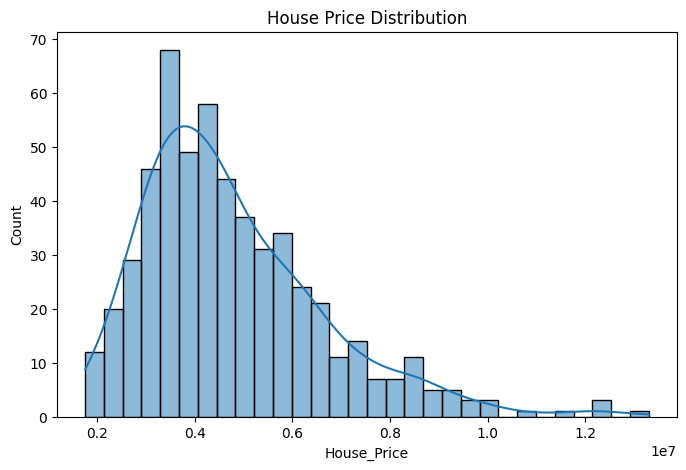

In [85]:
"""
## Step 4: Exploratory Data Analysis (EDA)
"""
# Price Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['House_Price'], bins=30, kde=True)
plt.title('House Price Distribution')

- The histogram is positively skewed, meaning most house prices are concentrated in the lower range, and fewer houses have higher prices.

- This indicates that affordable houses are more common, while high-priced houses are relatively rare.

- The highest frequency of houses appears in the 3M–5M price range.

- This suggests that mid-range houses are the most common in this dataset.

Text(0.5, 1.0, 'Feature Correlation Heatmap')

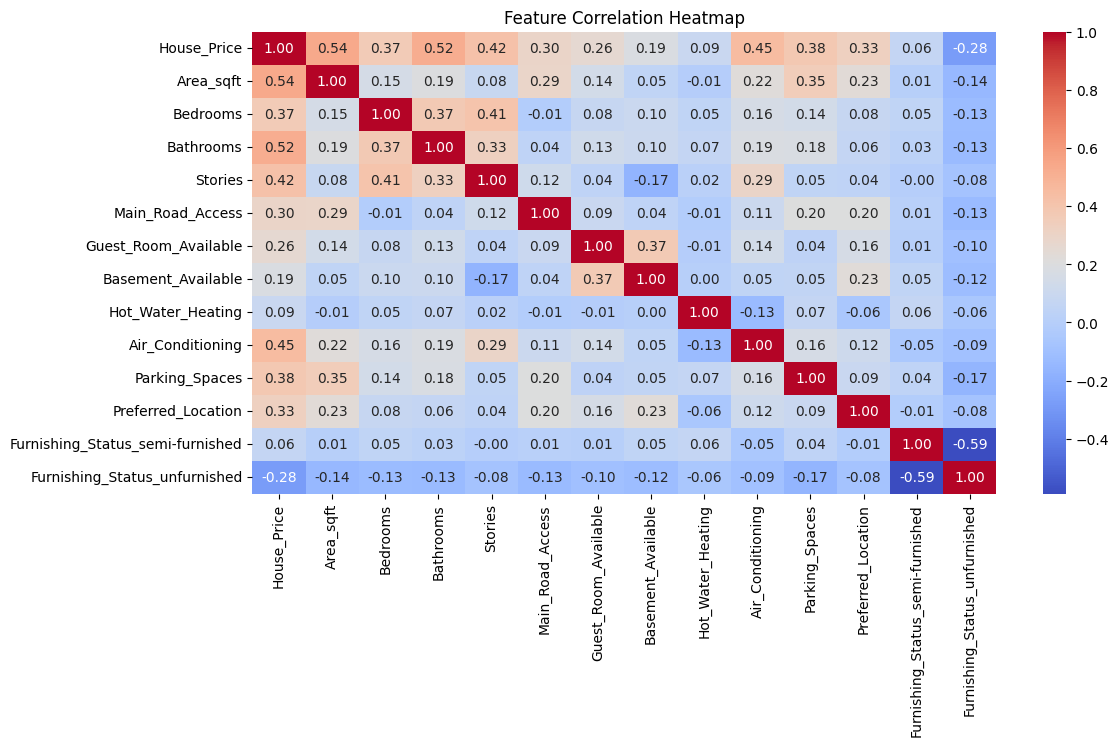

In [86]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')

#### House Price Correlations:
- House_Price has the strongest correlation with Area_sqft (0.54), Bathrooms (0.52), and Air_Conditioning (0.45). This suggests that larger - houses with more bathrooms and air conditioning tend to have higher prices.

- A negative correlation is seen with Furnishing_Status_unfurnished (-0.28), indicating that unfurnished houses might have lower prices.

- Features like Hot_Water_Heating, Guest_Room_Available, and Basement_Available have weak correlations with most variables, suggesting they don’t significantly impact house prices.

### Model Training 

In [87]:
"""
## Step 5: Define Features and Target Variable
"""
X = data.drop(columns=['House_Price'])
y = data['House_Price']

In [88]:
# Handle outliers 
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
y = np.where(y > upper_limit, upper_limit, y)
y = np.where(y < lower_limit, lower_limit, y)

# Optional: Check the data after handling outliers
print(data['House_Price'].describe())

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: House_Price, dtype: float64


In [89]:
"""
## Step 6: Split the Dataset into train and test
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
X_train.shape, y_train.shape

((436, 13), (436,))

In [91]:
"""
## Step 7: Feature Scaling
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [92]:
"""
## Step 8: Train Linear Regression Model
"""
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [93]:
"""
## Step 9: Make Predictions
"""
y_pred = model.predict(X_test)

# Print the predicted prices
# print("Predicted Prices:", y_pred)

Text(0.5, 1.0, 'Actual vs Predicted price')

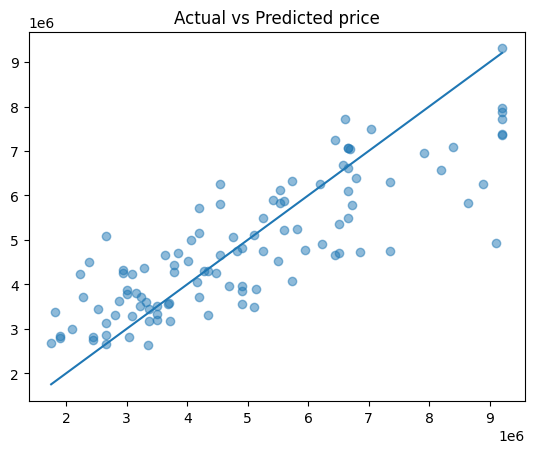

In [97]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([min(y_test),max(y_test)], [min(y_test), max(y_test)])
plt.xlabel = ("Actual Price")
plt.ylabel = ("predicted Price")
plt.title("Actual vs Predicted price")

### Model Evaluation

In [94]:
"""
## Step 10: Evaluate the Model
"""
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MAE: 869709.5970885226
MSE: 1275852327984.674
RMSE: 1129536.333184849
R2 Score: 0.6841865161626437
